In [46]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint, EarlyStopping
import pandas as pd
import numpy 
import tensorflow as tf
import matplotlib.pyplot as plt

In [47]:
df_pre = pd.read_csv('../dataset/wine.csv', header = None)
df = df_pre.sample(frac=0.15)
"""sample() : 원본 데이터에서 정해진 비율만큼 랜덤으로 뽑아오는 함수 / frac = : 원본 데이터에서부터 불러올 비율을 설정함"""

'sample() : 원본 데이터에서 정해진 비율만큼 랜덤으로 뽑아오는 함수 / frac = : 원본 데이터에서부터 불러올 비율을 설정함'

In [48]:
print(df.head())

       0     1     2    3      4     5      6        7     8     9      10  \
5853  7.5  0.29  0.24  9.9  0.058  25.0  115.0  0.99567  3.15  0.46  10.90   
2564  8.3  0.23  0.43  3.2  0.035  14.0  101.0  0.99280  3.15  0.36  11.50   
6102  5.8  0.61  0.01  8.4  0.041  31.0  104.0  0.99090  3.26  0.72  14.05   
5695  8.0  0.25  0.35  1.1  0.054  13.0  136.0  0.99366  3.08  0.55   9.50   
4321  7.6  0.40  0.27  5.2  0.030  32.0  101.0  0.99172  3.22  0.62  12.30   

      11  12  
5853   5   0  
2564   5   0  
6102   7   0  
5695   5   0  
4321   7   0  


In [49]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 975 entries, 5853 to 2747
Data columns (total 13 columns):
0     975 non-null float64
1     975 non-null float64
2     975 non-null float64
3     975 non-null float64
4     975 non-null float64
5     975 non-null float64
6     975 non-null float64
7     975 non-null float64
8     975 non-null float64
9     975 non-null float64
10    975 non-null float64
11    975 non-null int64
12    975 non-null int64
dtypes: float64(11), int64(2)
memory usage: 106.6 KB
None


In [50]:
print(df.describe())

               0           1           2           3           4           5   \
count  975.000000  975.000000  975.000000  975.000000  975.000000  975.000000   
mean     7.155846    0.339010    0.311149    5.685538    0.054515   31.867179   
std      1.239279    0.166521    0.146277    4.899665    0.031194   20.359526   
min      3.800000    0.105000    0.000000    0.700000    0.015000    3.000000   
25%      6.400000    0.230000    0.240000    1.800000    0.037000   18.000000   
50%      6.900000    0.290000    0.300000    3.500000    0.046000   29.000000   
75%      7.600000    0.400000    0.380000    8.500000    0.062500   42.000000   
max     15.900000    1.580000    1.000000   31.600000    0.358000  289.000000   

               6           7           8           9           10          11  \
count  975.000000  975.000000  975.000000  975.000000  975.000000  975.000000   
mean   118.675385    0.994736    3.220708    0.526759   10.447949    5.790769   
std     57.045769    0.0030

In [51]:
# seed 값 설정
seed=0
numpy.random.seed(seed)
tf.set_random_seed(seed)

In [52]:
# 데이터 입력
dataset = df.values
X = dataset[:, 0:12]
Y = dataset[:, 12]

In [53]:
# 모델 설정
model = Sequential()
model.add(Dense(30, input_dim = 12, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [54]:
# 모델 컴파일
model.compile(loss='binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])

In [55]:
#모델 저장 폴더 설정
import os
MODEL_DIR = './model'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)

In [56]:
#모델 저장 조건 설정
modelpath="./model/{epoch:02d}-{val_loss:.4f}.hdf5"

In [56]:
# 모델 업데이트 및 저장
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)

In [57]:
# 학습 자동 중단 설정
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=100)

In [58]:
model.fit(X, Y, validation_split=0.2, epochs=3500, batch_size=500, verbose=0, callbacks=[early_stopping_callback, checkpointer])


Epoch 00001: val_loss improved from inf to 1.03082, saving model to ./model/01-1.0308.hdf5

Epoch 00002: val_loss improved from 1.03082 to 0.89801, saving model to ./model/02-0.8980.hdf5

Epoch 00003: val_loss improved from 0.89801 to 0.77216, saving model to ./model/03-0.7722.hdf5

Epoch 00004: val_loss improved from 0.77216 to 0.65075, saving model to ./model/04-0.6508.hdf5

Epoch 00005: val_loss improved from 0.65075 to 0.53833, saving model to ./model/05-0.5383.hdf5

Epoch 00006: val_loss improved from 0.53833 to 0.44052, saving model to ./model/06-0.4405.hdf5

Epoch 00007: val_loss improved from 0.44052 to 0.36674, saving model to ./model/07-0.3667.hdf5

Epoch 00008: val_loss improved from 0.36674 to 0.33557, saving model to ./model/08-0.3356.hdf5

Epoch 00009: val_loss did not improve from 0.33557

Epoch 00010: val_loss did not improve from 0.33557

Epoch 00011: val_loss did not improve from 0.33557

Epoch 00012: val_loss did not improve from 0.33557

Epoch 00013: val_loss impro

In [59]:
# 모델 실행 및 저장
history = model.fit(X, Y, validation_split=0.33, epochs=3500, batch_size=500)

# y_vloss_테스트셋으로 실험 결과의 오차 값
# y_acc_ 학습셋 정확도 값
y_vloss = history.history['val_loss']
y_acc = history.history['acc']

Train on 653 samples, validate on 322 samples
Epoch 1/3500
653/653 [==============================] - 0s 12us/step - loss: 0.0218 - acc: 0.9923 - val_loss: 0.0311 - val_acc: 0.9845
Epoch 2/3500
653/653 [==============================] - 0s 12us/step - loss: 0.0203 - acc: 0.9954 - val_loss: 0.0388 - val_acc: 0.9814
Epoch 3/3500
653/653 [==============================] - 0s 16us/step - loss: 0.0226 - acc: 0.9954 - val_loss: 0.0318 - val_acc: 0.9845
Epoch 4/3500
653/653 [==============================] - 0s 10us/step - loss: 0.0203 - acc: 0.9954 - val_loss: 0.0359 - val_acc: 0.9814
Epoch 5/3500
653/653 [==============================] - 0s 11us/step - loss: 0.0255 - acc: 0.9908 - val_loss: 0.0310 - val_acc: 0.9876
Epoch 6/3500
653/653 [==============================] - 0s 14us/step - loss: 0.0210 - acc: 0.9954 - val_loss: 0.0417 - val_acc: 0.9814
Epoch 7/3500
653/653 [==============================] - 0s 12us/step - loss: 0.0255 - acc: 0.9923 - val_loss: 0.0308 - val_acc: 0.9845
Epoch 8/3

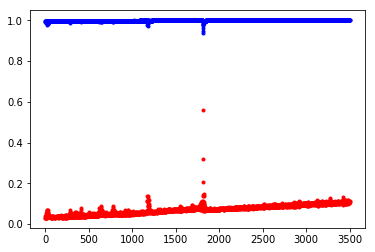

In [60]:
x_len = numpy.arange(len(y_acc))
plt.plot(x_len, y_vloss, "o", c="red", markersize = 3)
plt.plot(x_len, y_acc, "o", c="blue", markersize = 3)
plt.show()